<a href="https://colab.research.google.com/github/mvresh/NBA2008/blob/master/NBA2008.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%load_ext autoreload
%autoreload 2

In [0]:
import pandas as pd
import seaborn as sns

data = pd.read_csv('ppg2008.csv', index_col=0)
data.index = data.index.map(lambda x: x.strip())

labels = ['Games', 'Minutes', 'Points', 'Field goals made',
          'Field goal attempts', 'Field goal percentage', 'Free throws made',
          'Free throws attempts', 'Free throws percentage',
          'Three-pointers made', 'Three-point attempt',
          'Three-point percentage', 'Offensive rebounds', 'Defensive rebounds',
          'Total rebounds', 'Assists', 'Steals', 'Blocks', 'Turnover',
          'Personal foul']

data.columns = labels

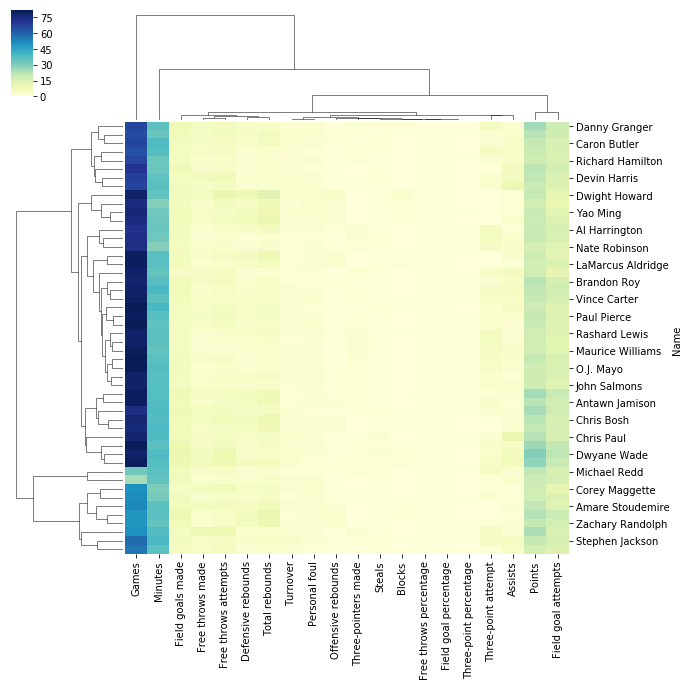

In [0]:
col_dendrogram = sns.clustermap(data, cmap="YlGnBu")

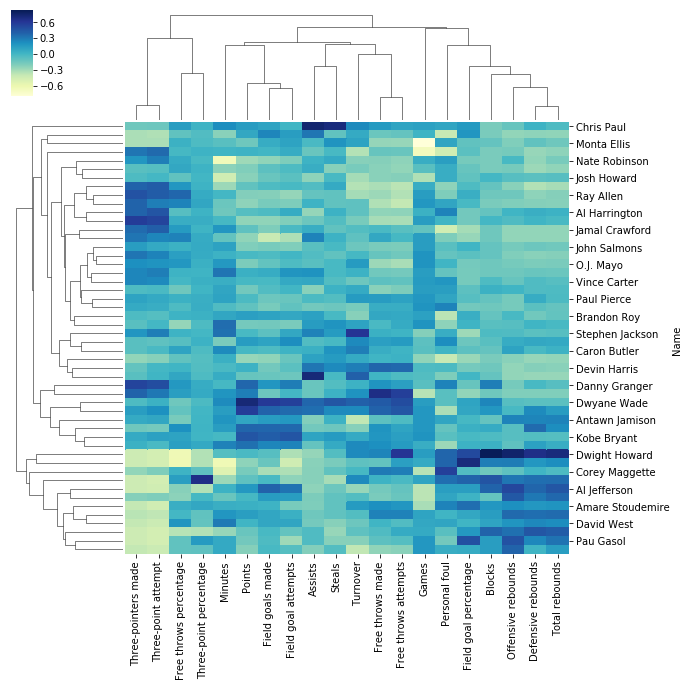

In [0]:
data_normalized = data

# now since in the map above there's some discrepeancy with the games datapoints and another such row, its better to normalize the data

# approach - standardize the mean and variance in one stat and comparing them to others

# changing all datapoints to their respective z scores

data_normalized = (data_normalized - data_normalized.mean())/data_normalized.var()

# Normalize these values to range from -1 to 1
data_normalized = (data_normalized)/(data_normalized.max() - data_normalized.min())


sns.clustermap(data_normalized, cmap="YlGnBu")



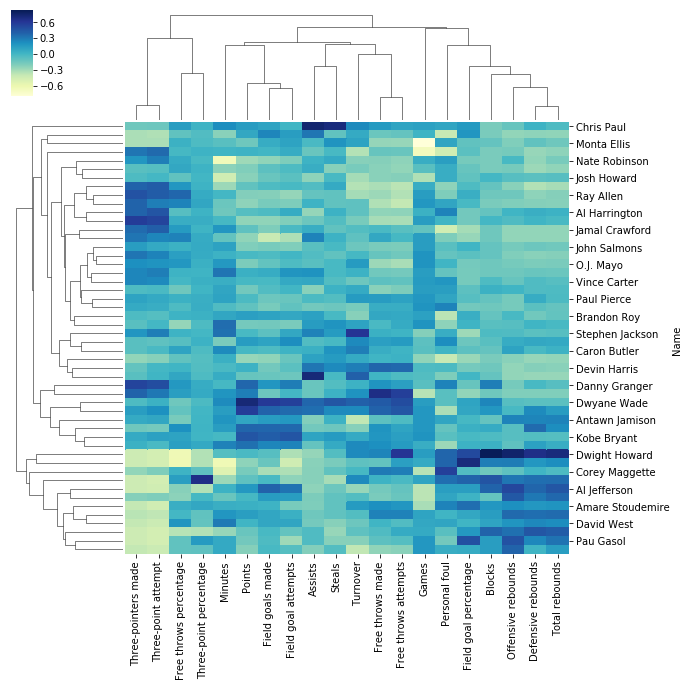

In [5]:
import matplotlib.pyplot as plt
sns.clustermap(data_normalized, cmap="YlGnBu")
fig = plt.gcf()
fig.savefig('clusteredheatmap_bbox_tight.png', bbox_inches='tight')

In [0]:
tidy_df = pd.melt(data_normalized.reset_index())
tidy_df.head()
pivot_kws = dict(columns='variable', values='value')
tidy_df.pivot(**pivot_kws).head()